In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_fashion_train = pd.read_csv('fashion-mnist_train.csv',sep=',')

In [5]:
df_fashion_test = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [6]:
df_fashion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
df_fashion_train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [40]:
train_data = np.array(df_fashion_train, dtype='float32')

In [41]:
test_data = np.array(df_fashion_test, dtype='float32')

In [42]:
train_data.shape

(60000, 785)

In [43]:
X_train = train_data[:,1:]/255

In [44]:
y_train = train_data[:,0:1]

In [45]:
y_train.shape

(60000, 1)

In [46]:
X_test =test_data[:,1:]/255

In [47]:
y_test = test_data[:,0:1]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_validate, y_train, y_validate = train_test_split( X_train, y_train, test_size=0.2, random_state=12345)

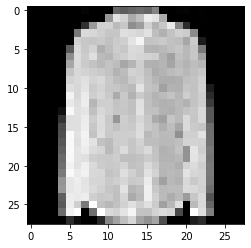

In [50]:
plt.imshow(train_data[2,1:].reshape(28,28),cmap='gray')

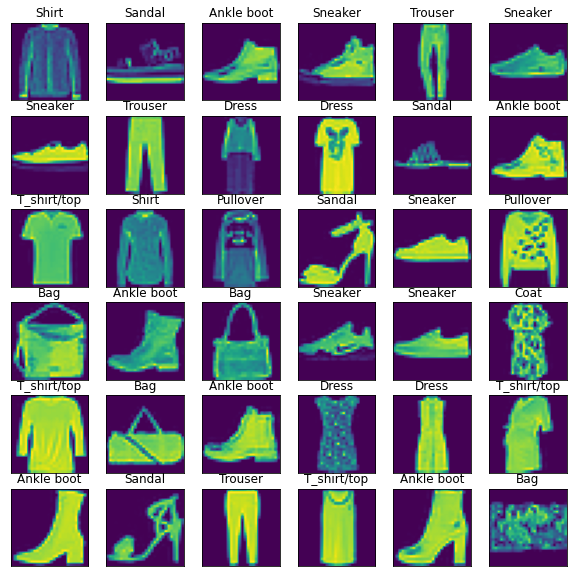

In [51]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

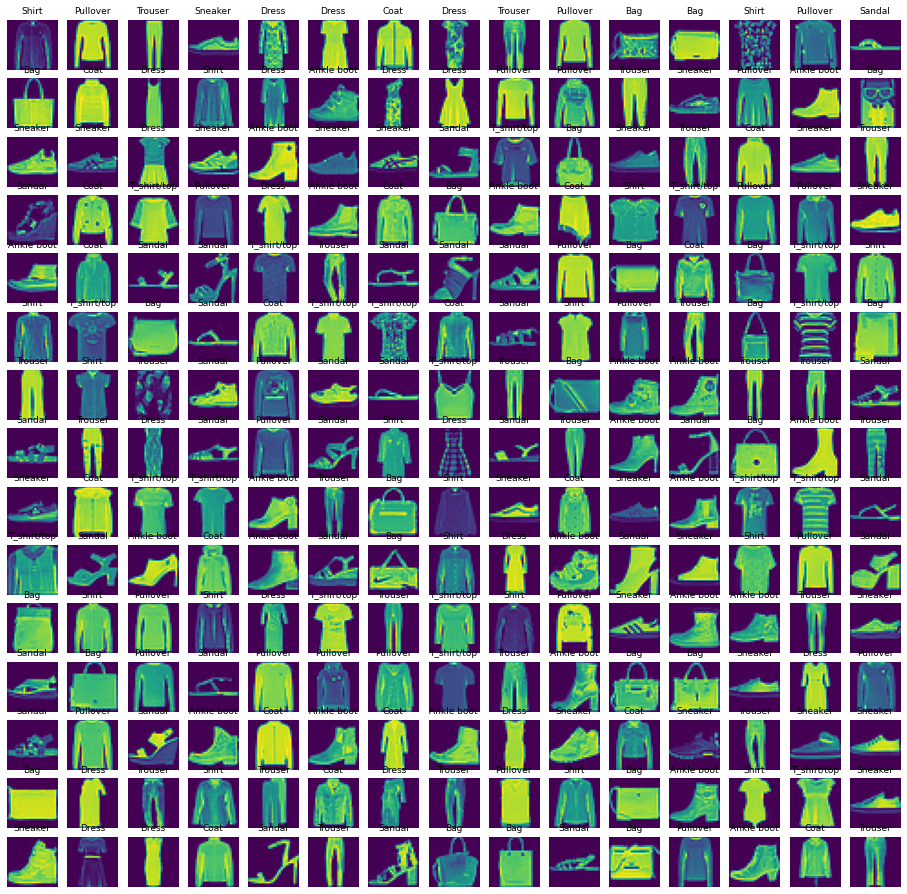

In [52]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.1)

In [53]:
X_train.shape

(48000, 784)

In [54]:
X_test.shape

(10000, 784)

In [55]:
X_validate.shape


(12000, 784)

In [56]:
image_rows = 28
image_columns = 28
batch_size = 4096
image_size = (image_rows,image_columns,1)

In [57]:
image_size

(28, 28, 1)

In [63]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [64]:
X_train.shape

(48000, 28, 28, 1)

In [65]:
y_train.shape

(48000, 1)

In [66]:
X_validate.shape

(12000, 28, 28, 1)

In [67]:
import keras

In [68]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [70]:
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

In [71]:
cnn_model.add(MaxPooling2D(pool_size =(2,2)))

In [72]:
cnn_model.add(Dropout(0.25))

In [73]:
cnn_model.add(Flatten())

In [74]:
cnn_model.add(Dense(32,activation = 'relu'))

In [76]:
cnn_model.add(Dense(10,activation = 'softmax'))

In [77]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [80]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(X_validate,y_validate),
)

Epoch 1/75
12/12 [==============================] - 3s 247ms/step - loss: 2.3287 - accuracy: 0.1060 - val_loss: 2.2683 - val_accuracy: 0.1381
Epoch 2/75
12/12 [==============================] - 3s 212ms/step - loss: 2.2115 - accuracy: 0.2048 - val_loss: 2.1341 - val_accuracy: 0.2886
Epoch 3/75
12/12 [==============================] - 3s 212ms/step - loss: 2.0753 - accuracy: 0.3062 - val_loss: 1.9994 - val_accuracy: 0.3465
Epoch 4/75
12/12 [==============================] - 3s 221ms/step - loss: 1.9514 - accuracy: 0.3815 - val_loss: 1.8879 - val_accuracy: 0.4291
Epoch 5/75
12/12 [==============================] - 3s 228ms/step - loss: 1.8568 - accuracy: 0.4400 - val_loss: 1.8092 - val_accuracy: 0.4719
Epoch 6/75
12/12 [==============================] - 3s 217ms/step - loss: 1.7893 - accuracy: 0.4639 - val_loss: 1.7507 - val_accuracy: 0.4903
Epoch 7/75
12/12 [==============================] - 3s 231ms/step - loss: 1.7366 - accuracy: 0.4831 - val_loss: 1.7010 - val_accuracy: 0.5081
Epoch 

12/12 [==============================] - 3s 230ms/step - loss: 0.7607 - accuracy: 0.8198 - val_loss: 0.7396 - val_accuracy: 0.8267
Epoch 59/75
12/12 [==============================] - 3s 227ms/step - loss: 0.7550 - accuracy: 0.8187 - val_loss: 0.7322 - val_accuracy: 0.8272
Epoch 60/75
12/12 [==============================] - 3s 221ms/step - loss: 0.7485 - accuracy: 0.8195 - val_loss: 0.7254 - val_accuracy: 0.8273
Epoch 61/75
12/12 [==============================] - 3s 219ms/step - loss: 0.7401 - accuracy: 0.8218 - val_loss: 0.7187 - val_accuracy: 0.8274
Epoch 62/75
12/12 [==============================] - 3s 224ms/step - loss: 0.7340 - accuracy: 0.8202 - val_loss: 0.7119 - val_accuracy: 0.8299
Epoch 63/75
12/12 [==============================] - 3s 229ms/step - loss: 0.7271 - accuracy: 0.8209 - val_loss: 0.7056 - val_accuracy: 0.8300
Epoch 64/75
12/12 [==============================] - 3s 222ms/step - loss: 0.7199 - accuracy: 0.8244 - val_loss: 0.6995 - val_accuracy: 0.8306
Epoch 65/75

KeyError: 'acc'

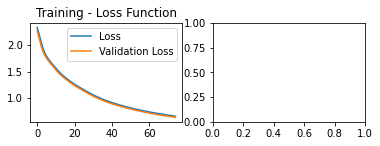

In [82]:
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [83]:
history

In [84]:
history.history

{'loss': [2.3286855220794678,
  2.2115085124969482,
  2.075289487838745,
  1.9514281749725342,
  1.8568408489227295,
  1.7893258333206177,
  1.7365590333938599,
  1.6901353597640991,
  1.6465129852294922,
  1.6055909395217896,
  1.5657304525375366,
  1.5236331224441528,
  1.4864131212234497,
  1.4515496492385864,
  1.4213818311691284,
  1.3907769918441772,
  1.362572431564331,
  1.335705041885376,
  1.3104788064956665,
  1.2859086990356445,
  1.2623517513275146,
  1.2396306991577148,
  1.218198537826538,
  1.1971102952957153,
  1.1765391826629639,
  1.1569699048995972,
  1.1360498666763306,
  1.1162569522857666,
  1.0975784063339233,
  1.078969120979309,
  1.059540033340454,
  1.0429291725158691,
  1.0267045497894287,
  1.0117497444152832,
  0.9951708912849426,
  0.9820947051048279,
  0.9660924673080444,
  0.953350841999054,
  0.9422406554222107,
  0.9294090270996094,
  0.918138861656189,
  0.9049713611602783,
  0.8938589096069336,
  0.8829870820045471,
  0.8725979924201965,
  0.863762

In [85]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6342 - accuracy: 0.8374
Test Accuracy : 0.837


In [86]:
predicted_classes = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [88]:
predicted_classes = cnn_model.predict_classes(X_test)

TypeError: unsupported format string passed to numpy.ndarray.__format__

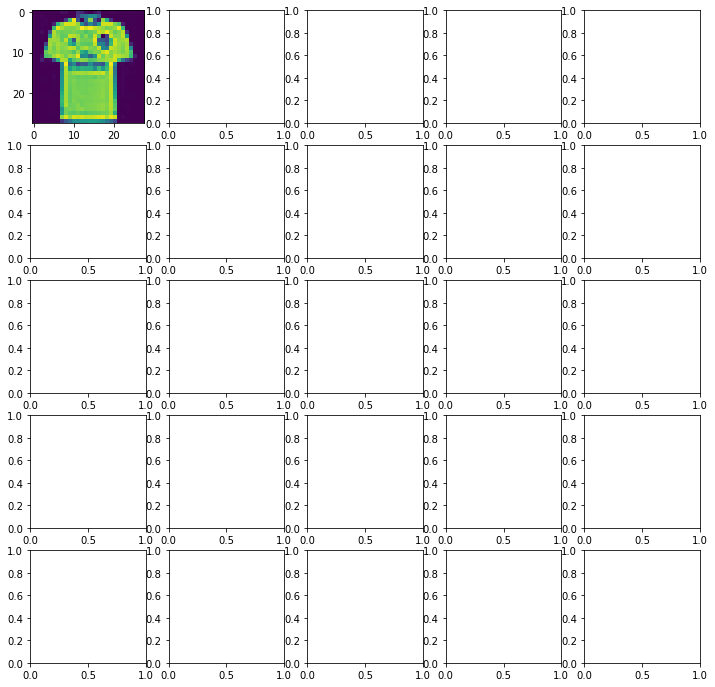

In [89]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

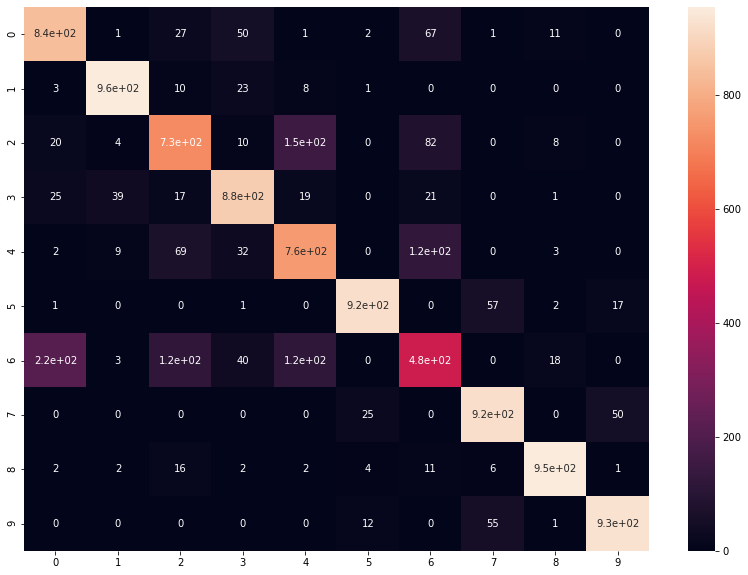

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [91]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.84      0.80      1000
     Class 1       0.94      0.95      0.95      1000
     Class 2       0.74      0.73      0.73      1000
     Class 3       0.85      0.88      0.86      1000
     Class 4       0.72      0.76      0.74      1000
     Class 5       0.95      0.92      0.94      1000
     Class 6       0.61      0.48      0.54      1000
     Class 7       0.89      0.93      0.91      1000
     Class 8       0.96      0.95      0.95      1000
     Class 9       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000

